In [9]:
dbutils.widgets.text("limit", "10")
dbutils.widgets.text("data_source_url", "")

Box(children=(Label(value='limit'), Text(value='10')))

Box(children=(Label(value='data_source_url'), Text(value='')))

# Download and analyse external data

In [10]:
data_source_url=dbutils.widgets.get("data_source_url")

In [11]:
%run ./download_dataset

/Users/kartik.gupta/temp/notebook-test/.venv/lib/python3.11/site-packages/pyspark/sql/connect/session.py:368: FutureWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if is_datetime64_dtype(t) or is_datetime64tz_dtype(t)
/Users/kartik.gupta/temp/notebook-test/.venv/lib/python3.11/site-packages/pyspark/sql/pandas/serializers.py:256: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(series.dtype):


+--------------------+--------------------+------------+-------------+--------------+------------+--------------------+-----------------+----------+------------------+---------------+-------------------+----------------+----------------+---+----+-----+--------------+---------+--------+--------------+------------------+----------+-------------+
|          track_name|      artist(s)_name|artist_count|released_year|released_month|released_day|in_spotify_playlists|in_spotify_charts|   streams|in_apple_playlists|in_apple_charts|in_deezer_playlists|in_deezer_charts|in_shazam_charts|bpm| key| mode|danceability_%|valence_%|energy_%|acousticness_%|instrumentalness_%|liveness_%|speechiness_%|
+--------------------+--------------------+------------+-------------+--------------+------------+--------------------+-----------------+----------+------------------+---------------+-------------------+----------------+----------------+---+----+-----+--------------+---------+--------+--------------+-------

In [4]:
df.describe()

,summary,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,count,953,953,953,953,953,953,953,953,953,953,953,953,953,903,953,858,953,953,953,953,953,953,953,953
1,mean,Infinity,None,1.5561385099685205,2018.2381951731375,6.033578174186778,13.930745015739769,5200.124868835257,12.009443861490032,5.1413742493907565E8,67.8121720881427,51.9087093389297,109.74027459954233,2.666316894018888,51.176339285714285,122.54039874081847,None,None,66.96956977964324,51.43126967471144,64.2791185729276,27.057712486883524,1.5813221406086044,18.213011542497377,10.131164742917104
2,stddev,NaN,None,0.8930441928452748,11.116218075505829,3.566435132898143,9.201949303162996,7897.608990375098,19.5759916360557,5.66856949038883E8,86.44149293264282,50.63024075697995,178.81140609266598,6.0355989423378675,126.48785636676818,28.057801508156174,None,None,14.630609874434809,23.48063183989133,16.550525977945235,25.996077310203738,8.409799926557698,13.7112233461488,9.912887609763244
3,min,'Till I Collapse,(G)I-DLE,1,1930,1,1,31,0,100409613,0,0,0,0,0,65,A,Major,23,4,9,0,0,3,2
4,max,ýýýýýýýýýýýýýýýýýýýýý,teto,8,2023,12,31,52898,147,BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3,672,275,99,58,99,206,G#,Minor,96,97,97,97,91,97,64


/var/folders/64/wjp913c52hbf4sfsfcymm5gm0000gp/T/ipykernel_53970/395576651.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists["artist(s)_name"], y=top_artists["count"], palette='viridis')


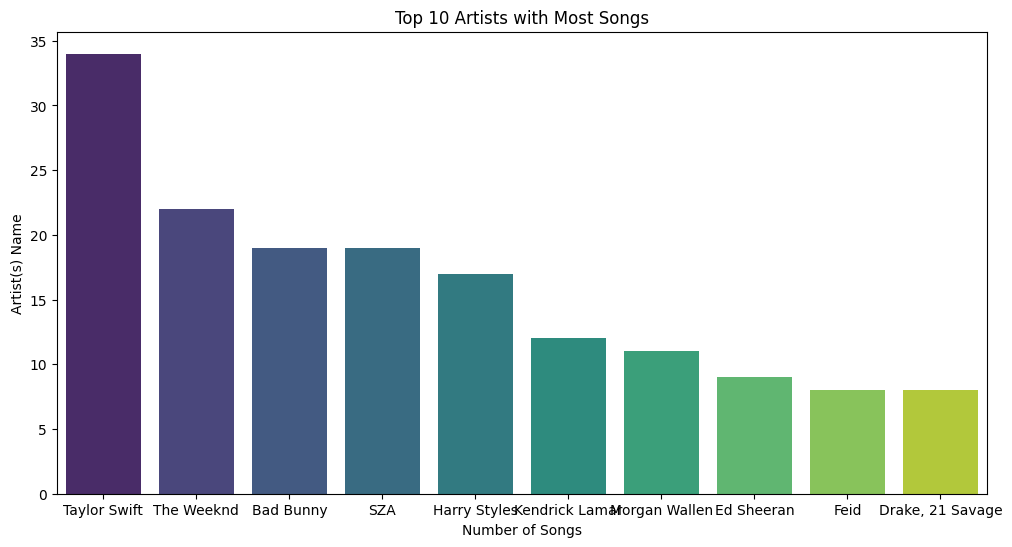

,artist(s)_name,count
0,Taylor Swift,34
1,The Weeknd,22
2,Bad Bunny,19
3,SZA,19
4,Harry Styles,17
5,Kendrick Lamar,12
6,Morgan Wallen,11
7,Ed Sheeran,9
8,Feid,8
9,"Drake, 21 Savage",8


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import functions as F

limit = int(dbutils.widgets.get("limit"))
# Top 10 artists with most songs in the dataset
top_artists = df.groupBy("artist(s)_name").count().orderBy(F.desc("count")).limit(limit).toPandas()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists["artist(s)_name"], y=top_artists["count"], palette='viridis')
plt.xlabel('Number of Songs')
plt.ylabel('Artist(s) Name')
plt.title('Top 10 Artists with Most Songs')
plt.show()

top_artists

# Analyse data already in databricks

In [6]:
%sql
select * from samples.nyctaxi.trips
order by trip_distance desc

/Users/kartik.gupta/temp/notebook-test/.venv/lib/python3.11/site-packages/pyspark/sql/pandas/types.py:567: FutureWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if not is_datetime64tz_dtype(pser.dtype):
/Users/kartik.gupta/temp/notebook-test/.venv/lib/python3.11/site-packages/pyspark/sql/pandas/types.py:386: FutureWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if is_datetime64tz_dtype(s.dtype):


,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,fare_amount,pickup_zip,dropoff_zip
0,2016-02-22 21:17:27,2016-02-22 22:00:58,30.60,95.0,11371,7114
1,2016-01-07 04:07:58,2016-01-07 04:43:08,26.30,0.0,10018,10606
2,2016-02-06 12:18:51,2016-02-06 13:03:53,25.80,71.0,11422,11218
3,2016-02-16 22:30:58,2016-02-16 23:24:47,25.55,73.5,10009,11050
4,2016-02-17 22:23:14,2016-02-17 23:06:15,25.46,130.0,10103,7901
5,2016-02-21 03:31:58,2016-02-21 03:32:28,25.00,0.0,10502,10502
6,2016-01-31 02:08:31,2016-01-31 02:47:55,24.70,67.0,10002,11694
7,2016-01-16 23:05:32,2016-01-16 23:43:37,24.50,65.0,11422,10463
8,2016-01-05 16:07:58,2016-01-05 17:48:29,24.50,82.5,11422,11213
9,2016-01-21 00:58:34,2016-01-21 01:33:10,24.50,94.5,11371,10601


In [7]:
limit = int(dbutils.widgets.get("limit"))
df = _sqldf.limit(limit)

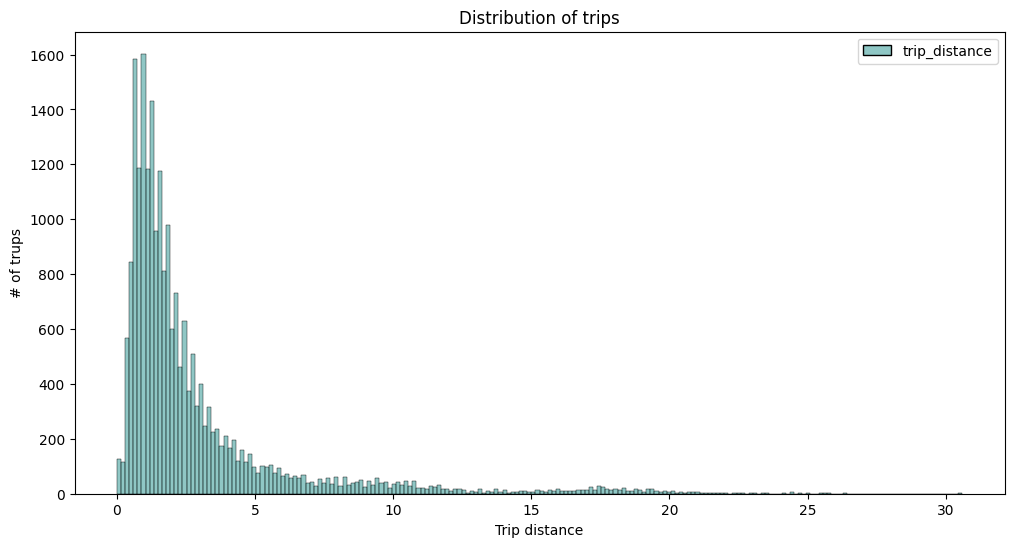

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import functions as F

limit = int(dbutils.widgets.get("limit"))
pdf = _sqldf.select("trip_distance").toPandas()

# Plot
plt.figure(figsize=(12, 6))
sns.histplot(data=pdf, palette='viridis')
plt.xlabel('Trip distance')
plt.ylabel('# of trups')
plt.title('Distribution of trips')
plt.show()